# Tienda Online ICE 


<div class="alert alert-block alert-info">
<b> Introduccion: 
Este analisis contiene informacion sobre la tienda online Ice que vende videojuegos por todo el mundo, el dataset contiene reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos. el objetivo es identificar patrones que determinen si un juego tiene éxito o no.

de aqui en adelante vas a observar el paso a paso que se realizo para poder realizar el analisis de la data, a grandes rasgos el paso a paso que se realizo consta de:
* importacion de librerioas y lectura inicial del dataset.
* Preparacion de datos.
* analisis de datos y variables.
* analisis de perfil de usuarios por region.
* Pruebas de hipotesis.
* Conclusiones finales 

Objetivo:

* identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Etapas:

el ejercicio se divide en varias etapas las cuales constan de:

* preparacion de los datos, ajustar formatos, crear columnas de soporte etc.
* Analisis de datos, tiene como fin entender la data que contiene el dataset, conocer que plataforma tiene mas ventas, que tipo de juego es el mayor puntuado, etc 
* Definir un perfil de usario (tipificacion del consumidor)
* y terminamos con unas pruebas de hipotesis para validar que el trabajo realizado tendra beneficios para el negocio

 </b> <a class="tocSkip"></a>
</div>





**importacion de librerias y dataset**

agregue dos campos de markdown con el fin de separa la importacion de librerias y la lectura inicial del dataset, en este segundo aprovecho para realizar una inspeccion rapida de columnas, esto con el fin de iniciar a conocer mejor el dataset.

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st


In [23]:
data_raw = pd.read_csv('C:/Users/L40527/OneDrive - Kimberly-Clark/Documents/Desarrollo JOB/VS CODE/datasets/games.csv')
#data_raw = pd.read_csv('/datasets/games.csv')
data_raw.info()

**Limpieza de datos**

una vez revisado el dataset, encuentro que hay columnas en la cuales los formatos no son los correctos (año de lanzamientos, user score), ademas los nombre de las columnas tiene una combinacion de mayusculas y minusculas, lo cual dificult el analisis y por ultimo encuentro que existen unos campos vacios, es necesario revisar, rellenar y los que no dejarlos como vacios. 

ademas de esto veo que es necesario agregar dos columnas para el analisis, decada de lanzamiento del juego y tambien una columna con el valor de  ventas totales. 

todos estos pasos los realizo en el siguiente cuadro de codigo:

In [42]:
data_raw.columns = data_raw.columns.str.lower()

data_raw['total_sales'] = data_raw['na_sales'] + data_raw['eu_sales'] + data_raw['jp_sales'] + data_raw['other_sales']
data_raw.fillna({'name': 'Desconocido', 'genre': 'Desconocido', 'year_of_release':0, 'rating':'Desconocido'}, inplace=True)
data_raw['user_score'] = data_raw['user_score'].replace('tbd', np.nan)
data_raw['user_score'] = data_raw['user_score'].astype('float')

# limpieza de vacios critic_score y user_score:
data_raw['critic_score'].fillna(data_raw['critic_score'].mean(), inplace=True)
data_raw['user_score'].fillna(data_raw['user_score'].mean(), inplace=True)


data_raw['year_of_release'] = data_raw['year_of_release'].astype('int')
data_raw['decade'] = (data_raw['year_of_release'] // 10) * 10
cols =['name', 'platform', 'year_of_release', 'decade', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']
data_raw = data_raw[cols]

display(data_raw.sample(10))


In [25]:
data_raw.info()

# Analisis de datos

Para el analisis de los datos tengo propuesto realizar un alaisis de toda la data inicialmente, esto con el fin de realizar un primer acercamiento con la data, entre este primer analisis esta la distribucion de juegos por año, la variacion de ventas entre plataformas para encontrar cuales son mas populares, y poder definfir un periodo de tiempo con el cual pueda definir como seria el escenario de ventas para el 2017. una vez hecho esto, generare un dataframe con el cual me sienta mas seguro para poder entender las tendencias y con el cual tambien se puedan analizar variables como que tipo de plataformas son las jugadas, que tipo de juegos son los mas comprados y ver que relacion existen entre las ventas y las diferentes calificaciones para los juegos y poder ver que tipo de ventas son las mas rentablea para la tienda. 



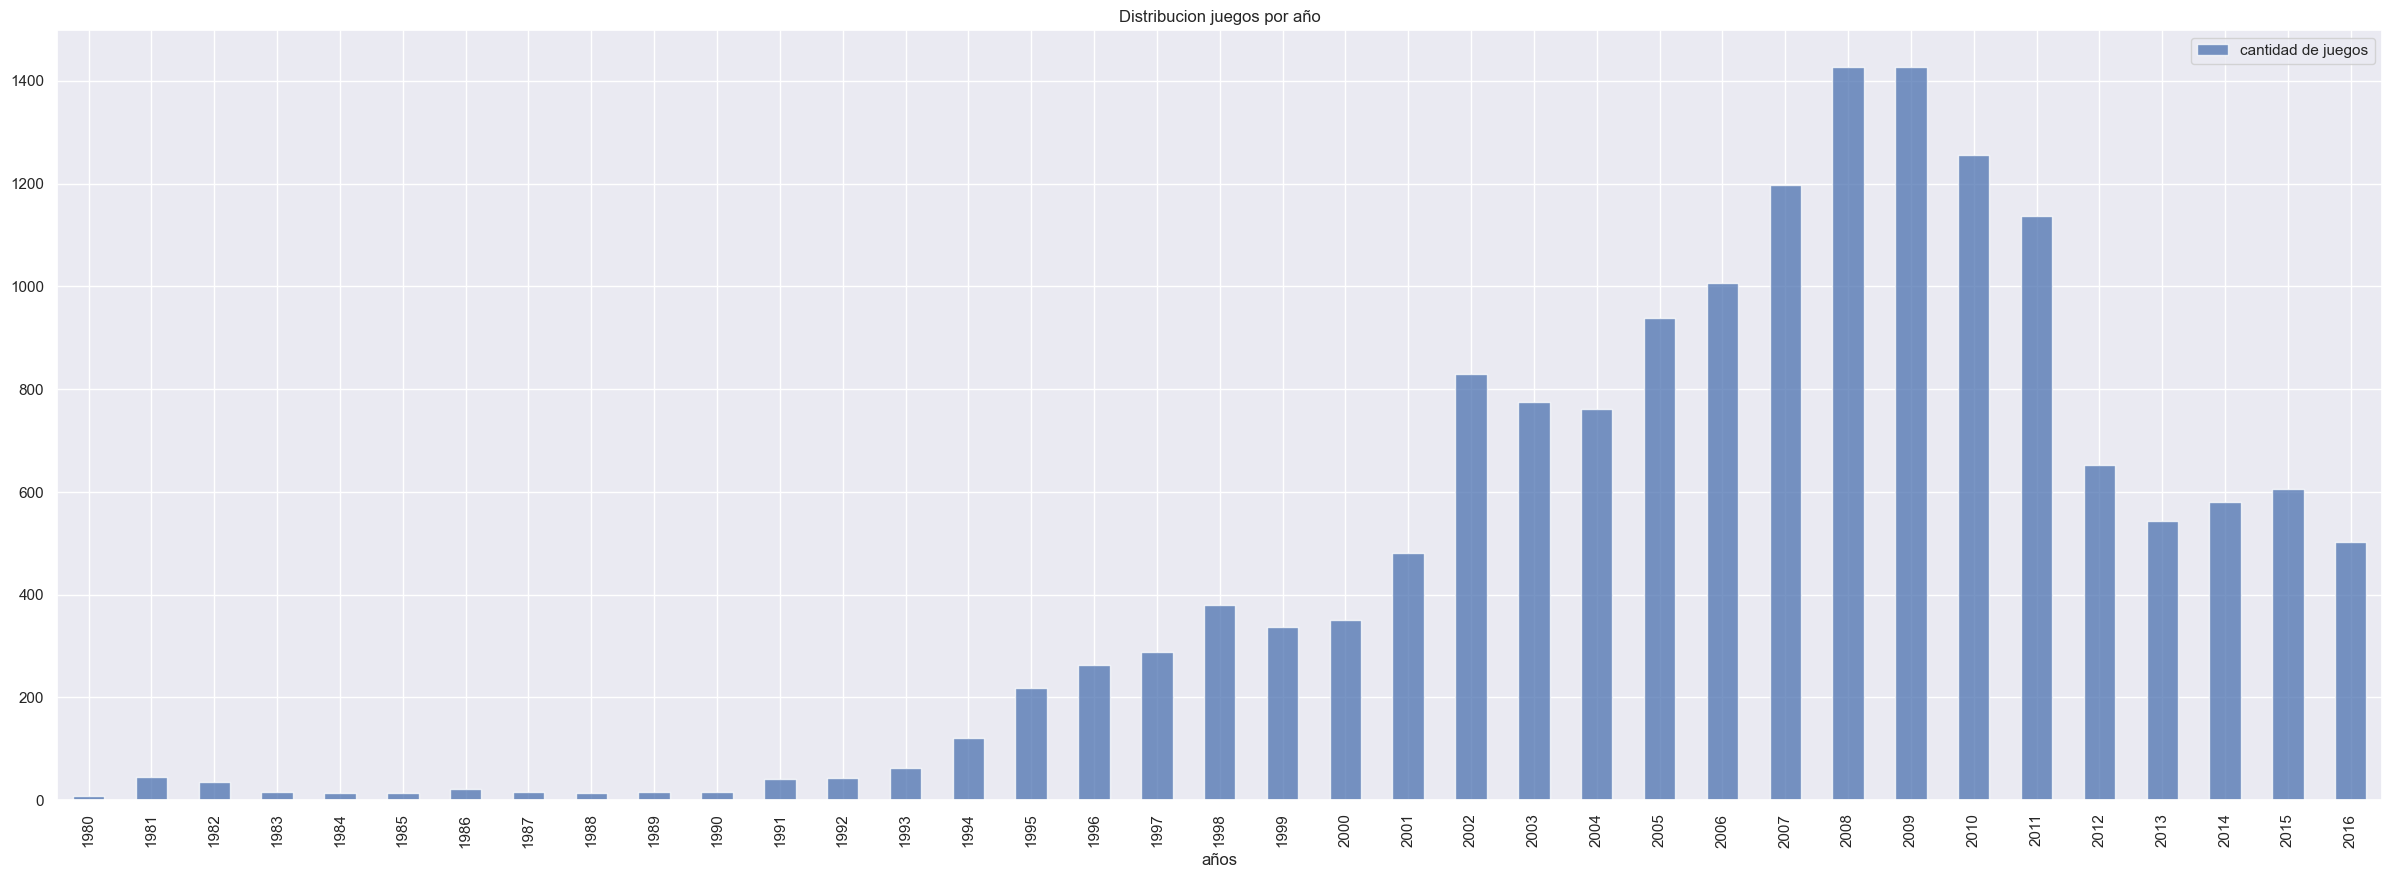

In [26]:
#Cantidad de juegos por año
games_per_year = data_raw.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['años', 'cantidad de juegos']
games_per_year.query('años > 0', inplace=True)
display(games_per_year)

games_per_year.plot(x='años', y='cantidad de juegos', kind='bar', title='Distribucion juegos por año', alpha = 0.75)
plt.show()

**Conclusion:**
En la grafica se puede observar que en la decada de los 2000´s hubo un auge de video games en la cual los lanzamientos de los juegos se triplicaron a nivel general luego para la decada de los 2010's en adlenate se ve que cambia la tendencia de juegos lanzados drasticamente a la mitad o menos anualmente. estos datos solo tiene en cuenta el numero de juegos lanzados, mas no el valor total de ventas que sera analizado en los futuros pasos.

## Ventas por plataforma

Para realizar el analisis de ventas por plataformas, es necesario agrupar el dataset por plataformas y sumar el total de ventas que se tienen a nivel mundial, con estos valores procedere a calcular la diferencia con el promedio de ventas totales y por calcular un indice de mayores ventas sobre las plataformas para ver cuales son las que generan las mayores ventas sobre el promedio en ventas. todo esta sera mostrado en una tabla y una grafica de barras para poder indentificar el mejor Z-score de las plataofrmas en la data  

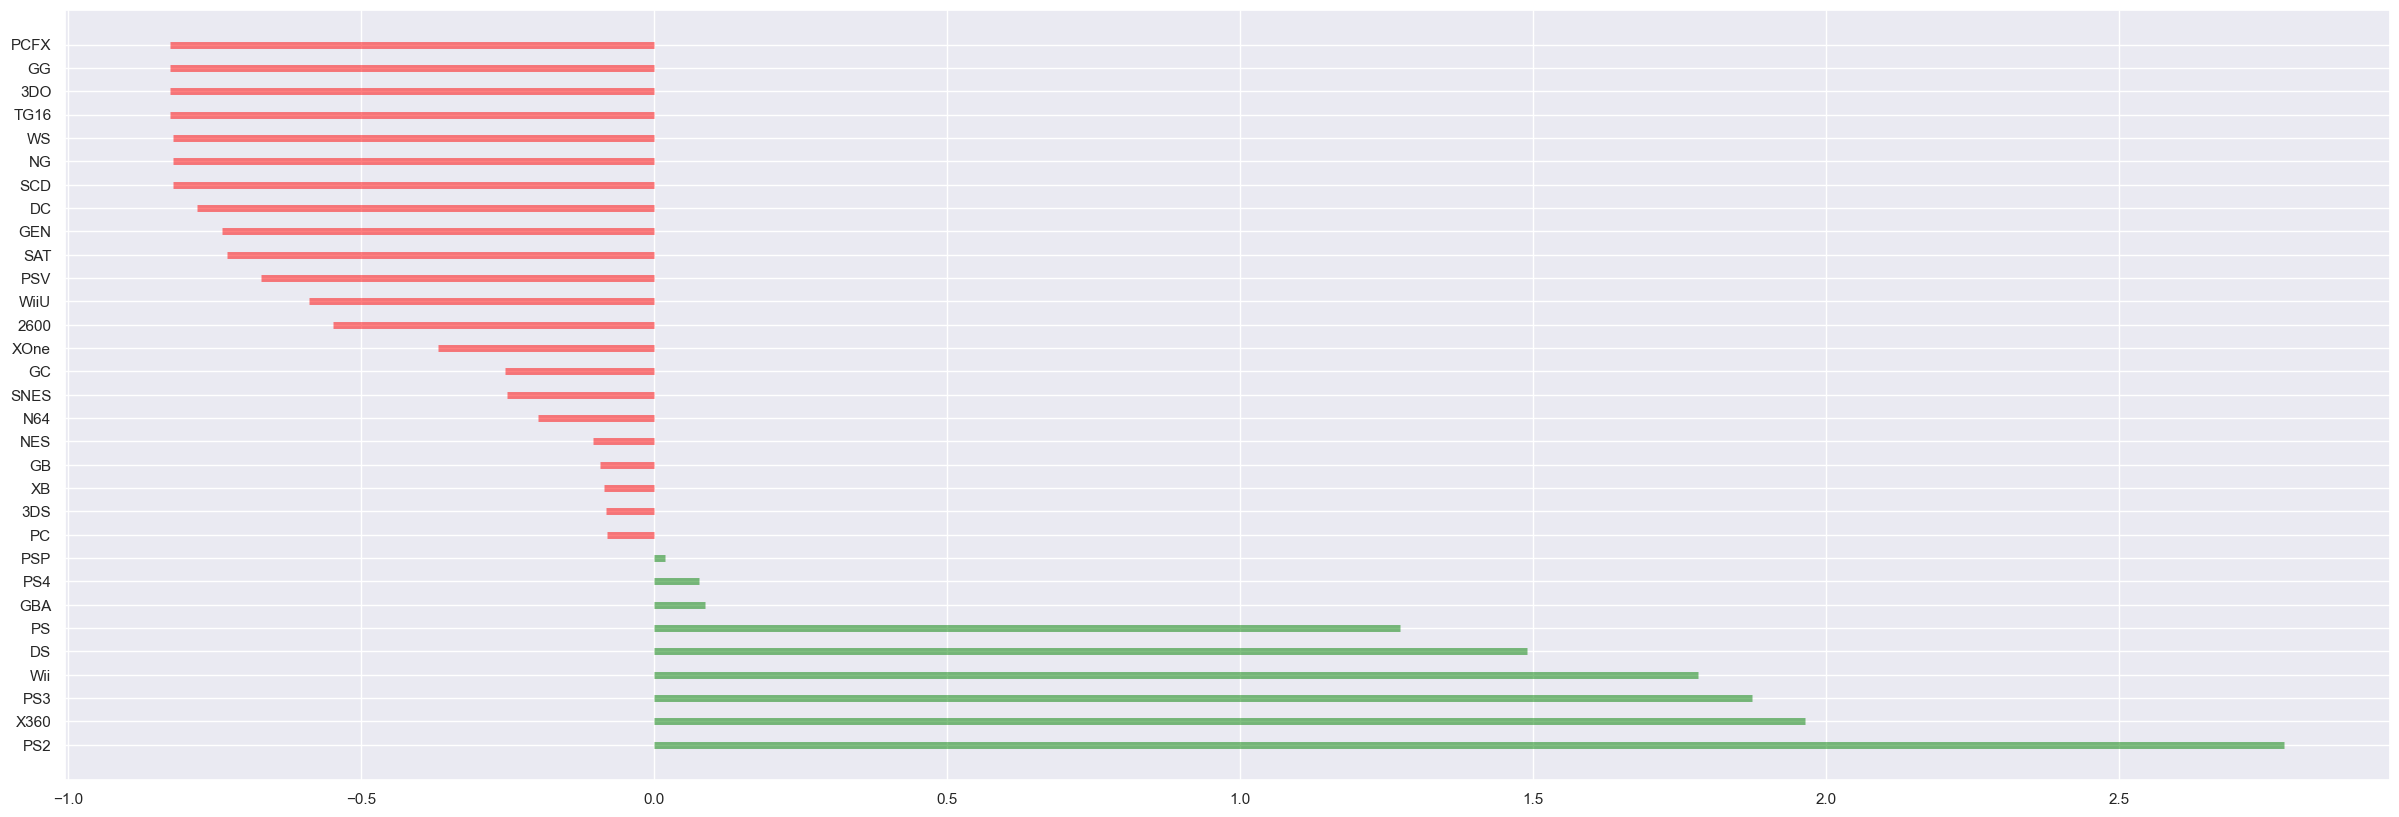

In [27]:
#ventas por plataformas
sales_platform =data_raw.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
sales_platform['zscore'] = (sales_platform['total_sales']-sales_platform['total_sales'].mean())/(sales_platform['total_sales'].std())
display(sales_platform)

sales_platform['color'] = ['red' if value <= 0 else 'green' for value in sales_platform['zscore']]

plt.hlines(
    y=sales_platform.platform,
    xmin=0,
    xmax=sales_platform.zscore,
    colors=sales_platform.color,
    alpha = 0.5,
    linewidth=5  
)
plt.show()

Este grafico esta mostrando que las plataformas que mas utilidad tienen en sus ventas son las que aparecen en verde y las rojas son lo opuesto para la tineda, lo que nos lleva a conluir que tanto las consolas de Sony (PS, PS2, PS3, PS4), como las de Microfsoft (x360) son las mas rentables para la tienda.

## Tiempo de vida plataformas

para poder saber el tiempo de vida de las plataformas, agrupe el dataset nuevamente sumando el valor total de ventas, tomando la agrupacion por años y plataforma. esto se muestra en la primer tabla dinamica, desfortunadamente es una data demasiado grande por visualizar, para evitar que el usuario pierda perspectiva en el analisis realizado, lineas abajo grafico esta misma tabla para que sea mas visual la tendencia desde 1980 a 2016, excluyendo los juegos que no tienen año de lanzamiento.  

In [28]:
#tiempo de plataforma

platform_life = data_raw.pivot_table(
    values='total_sales',
    index='year_of_release',
    columns='platform',
    aggfunc='sum'
).fillna(0)

platform_life.query('year_of_release > 0', inplace=True)
display(platform_life)


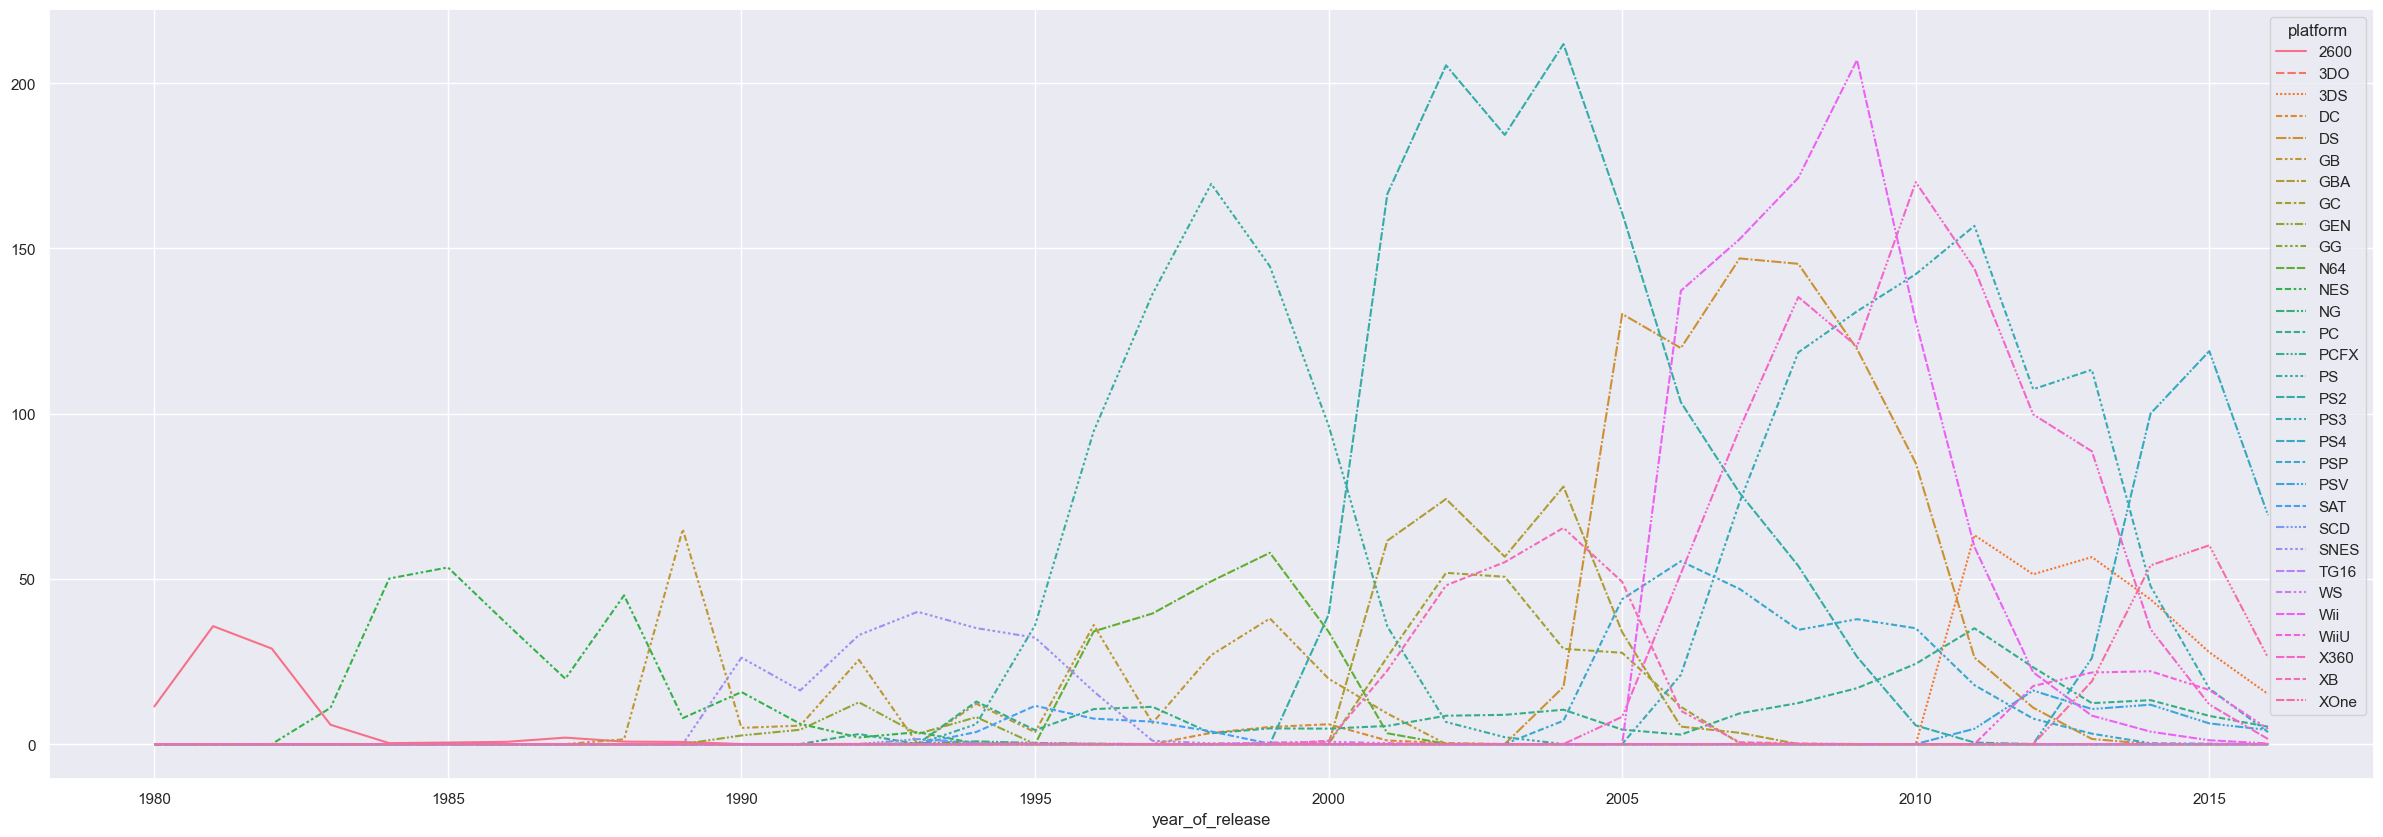

In [29]:
sns.set_theme(rc={'figure.figsize':(30,10)})
sns.lineplot(data=platform_life)
plt.show()

**Conclusion:**

Según la grafica anterior se puede analizar que el negocio de venta de videojuegos tiene un ciclo de ventas y unos competidores muy fuertes, asi como tambien se observa que la unica plataforma en la cual se mantiene en el tiempo son los PC, las demas plataformas tiene un ciclo de vida, el cual esta basado en los desarrollos tecnologicos que hay en el sector (cada fabricante remplaza cada cierto tiempo su plataforma por una nueva), asi como tambien se puede ver que a medida que pasa el tiempo los competidores de este nicho son menores dejandole las ventas a los grandes competidores.

## Modelo para el 2017

para poder realizar un analisis de ventas para el 2017, y segun un analisis de la grafica anteiror de ventas por plataformas a traves de los años, pienso que en un horizonte de 6 años podemos analizar suficiente data como para poder tener claro como se va a mover la venta del siguiente año. por tal motivo de aqui en adelante el dataser sera filtrado desde las ventas del 2010 y sobre esto se contruira el caso para el 2017.

In [30]:
#Datos limpios para prediccion
clean_data = data_raw[data_raw['year_of_release'] >= 2010]


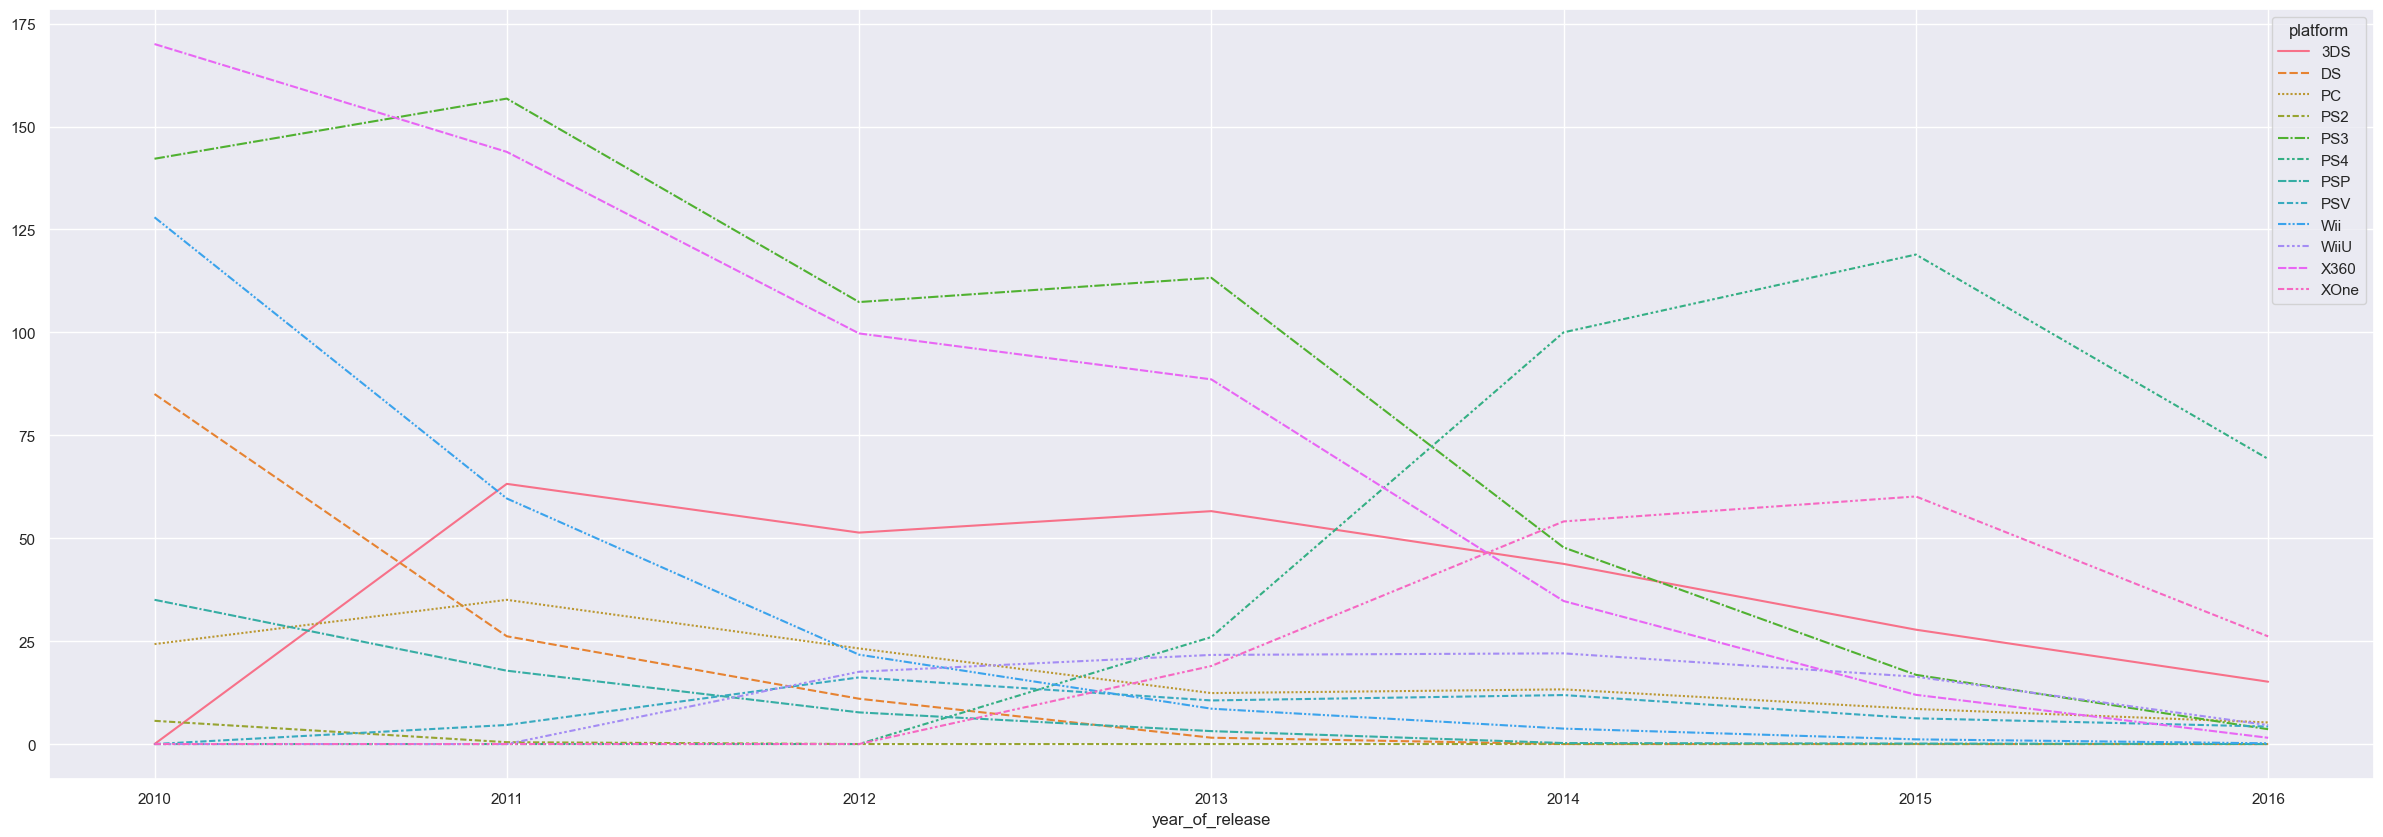

In [31]:
#analisis de tiempo de vida ultimos años

platform_life = clean_data.pivot_table(
    values='total_sales',
    index='year_of_release',
    columns='platform',
    aggfunc='sum'
).fillna(0)

platform_life.query('year_of_release > 0', inplace=True)
display(platform_life)
#grafica del resultado
sns.set_theme(rc={'figure.figsize':(30,10)})
sns.lineplot(data=platform_life)
plt.show()

## Plataformas lideres en ventas

despues de haber segmentado el dataset inicial y dejar solo informacion de los ultimos 6 años en ventas, procedo a analizar cual es el comportamiento de las ventas por plataforma y con esto busco entender cuales son las plataformas top en ventas de los ultimos años para poder predecir que pasara en el sigueinte año, todo esto lo realizare desde una grafica de boxplot, en la cual pueda ver la variacion en ventas por plataforma y contrastarlo con la grafica anterior, con esto podre analizar como es la distribucion de ventas de las plataformas, asi como tambien su tendencia en ventas para los ultimos años:

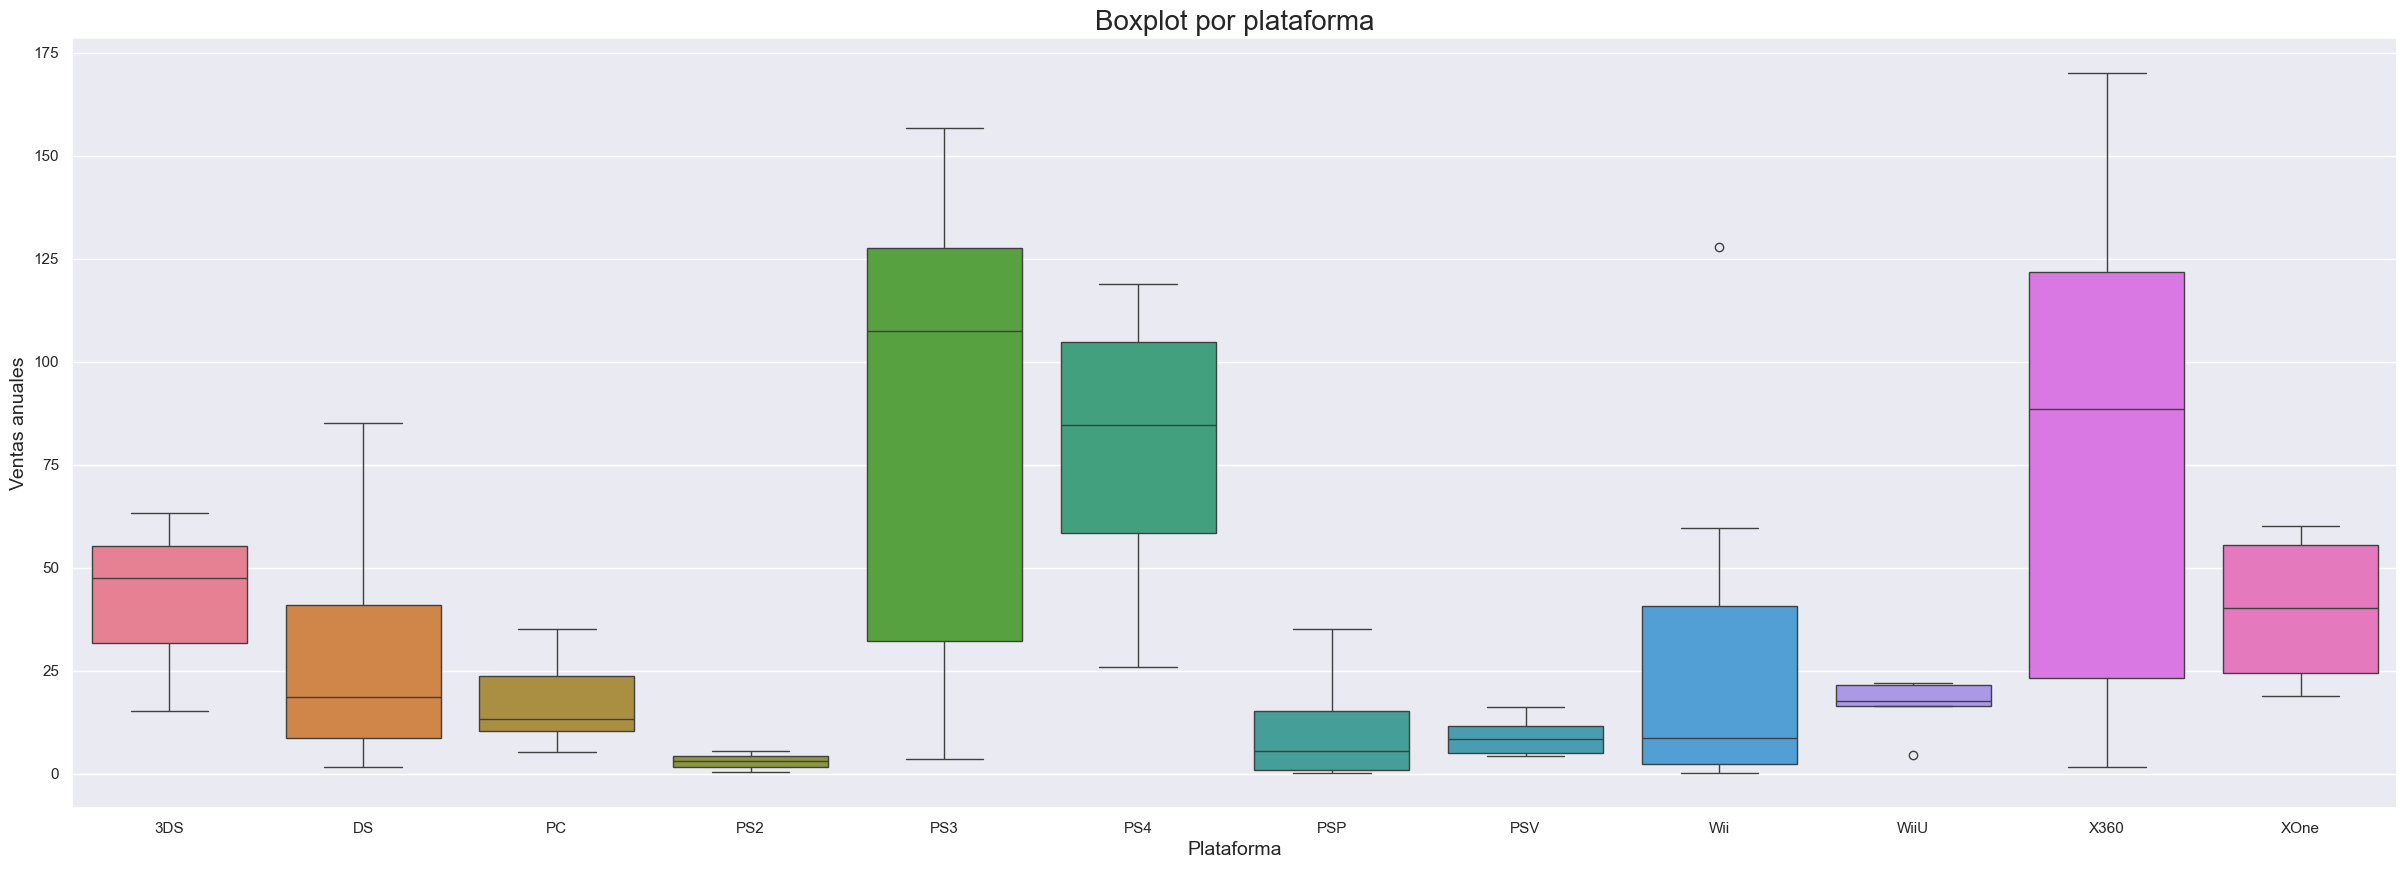

In [32]:
clean_sales_platform = clean_data.pivot_table(values='total_sales', index= ['platform', 'year_of_release'],  aggfunc='sum').fillna(0).reset_index()
clean_sales_platform_1 = clean_data.pivot_table(values='total_sales', index= 'platform', columns='year_of_release', aggfunc='sum').fillna(0)
print('PVT ventas ultimos años')
print('----')
display(clean_sales_platform_1)
print('----')

sns.boxplot(data = clean_sales_platform, x='platform', y='total_sales', hue='platform')
plt.title('Boxplot por plataforma', fontsize=20)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Ventas anuales', fontsize=14)
plt.show()

**Conclusion:**

Segun la grafica anterior y la tabla puedo analizar que para los ultimos años se vendioeron juegos para 12 plataformas de las cuales hay 6 plataformas las cuales sus ventas del ultimo año son nulas o estan en disminucion, esto es por que las 6 restantes son el auge actual de mercado, ademas existen paltaformas como la PS3 la cual fue un exito en venta para este rango de timepo, con una media de ventas por juego mucho mayor a las demas plataformas, pero que para el ultimo año sus ventas fueron disminullendo respecto a los anteriores, mientras que su prodecesor el PS4 mantiene una media menor cercana a la de la PS3 pero en un tiempo menor que la PS3, esto nos indica que la PS4 es una plataforma que esta en aude y que asi como la XOnes, es una plataforma que para el 2017 tendremos unas ventas considerables respecto a sus competidores. en el caso de PC, es una plataforma que mantiene una media baja respecto a todos los competidores, pero se mantiene en el tiempo con una variacion de ventas bastante baja.   


## Que relacion existen entre las ventas y las reseñas de usuarios y profesionales en los juegos?

Es momento de analizar que tieien que ver las reseñas con las ventas, y para esto he creado una funcion que me ayuda a analizar las que tengo en el dataset ajustado mediantes el calculode la correlacion entre las ventas totales y la calificaion de las reseñas por usuario, asi como tambien la correlacion de las ventas con la calificacion de los juegos por los expertos, todo esto es graficado en cada caso con un grafico de dispersion para poder analizar los datos de manera visual.


In [33]:
#correlacion
def correlacion(df, plataforma):
    print('*************')
    print(f"Analisis de correlaciones entre las ventas totalers y los puntajes de criticas por usuarios y expertos para la {plataforma}")
    print('*************')
    df_pivot = df.pivot_table(values=['total_sales', 'critic_score', 'user_score'], index= ['platform', 'name'],  aggfunc='sum').fillna(0).reset_index()
    df_pivot.query('platform == @plataforma & critic_score > 0 & user_score > 0', inplace=True)
    corr_critic = df_pivot['total_sales'].corr(df_pivot['critic_score'])
    sns.set_theme(rc={'figure.figsize':(7.5,7.5)})
    sns.scatterplot(data=df_pivot, x='critic_score', y='total_sales')
    plt.show()
    print(f"La correlación entre las ventas totales y la crítica para la plataforma {plataforma} es de: {corr_critic}")
    corr_user = df_pivot['total_sales'].corr(df_pivot['user_score'])
    sns.scatterplot(data=df_pivot, x='user_score', y='total_sales')
    plt.show()
    print(f"La correlación entre las ventas totales y la crítica para la plataforma {plataforma} es de: {corr_user}")
    print('*************')
    corr = df_pivot['critic_score'].corr(df_pivot['user_score'])
    correlaciones = pd.DataFrame({
    'Tipo de Crítica': ['Expertos', 'Usuarios', 'Entre criticas'],
    'Correlación con Ventas': [corr_critic, corr_user, corr]
    })
    display(correlaciones)
    return correlaciones




El siguiente paso es evaluar la formula para todas las paltaformas del dataset, antes de realizarlo he agregado un nuevo filtro al dataset, el cual remueve las plataformas que no tuvieron ventas considerables para el 2016 de jas las que presetaron mas de 4 millones de ventas, en dado caso que se requiera analizar las 12 plataformas, se puede comentar la primer linea del for y descomentar la siguiente.

In [34]:
sales_2016 = clean_sales_platform_1[clean_sales_platform_1[2016] > 4][2016]
sales_2016.index

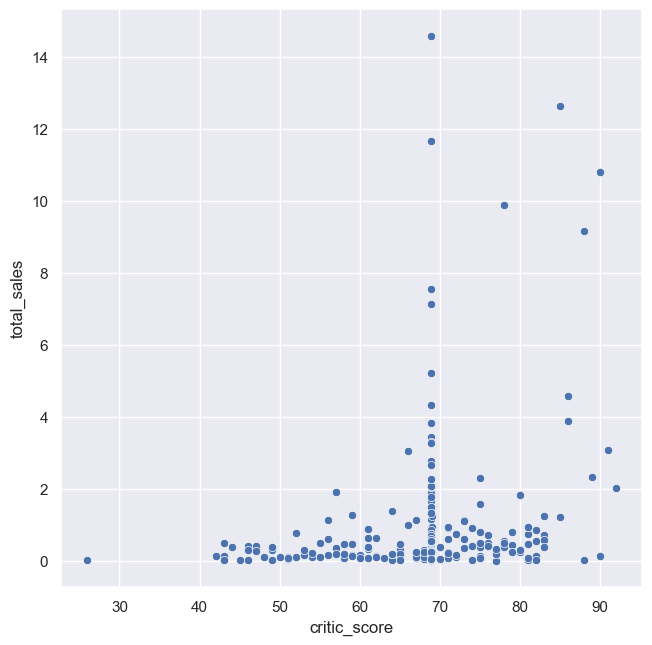

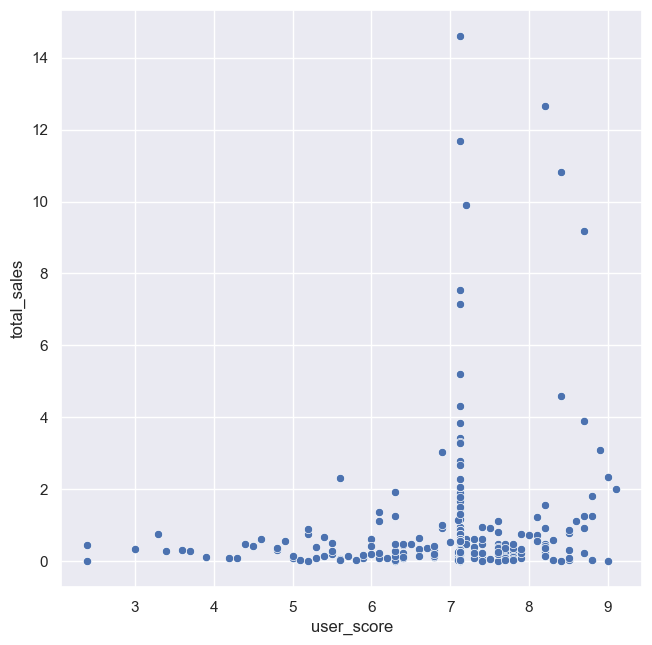

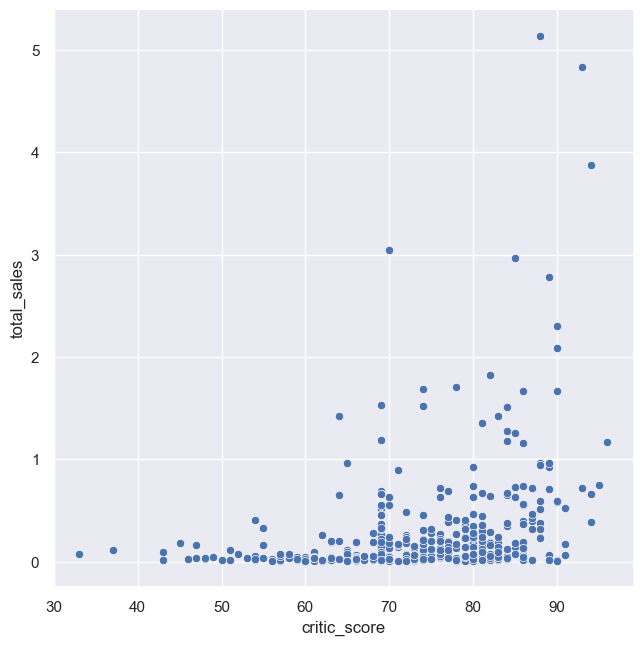

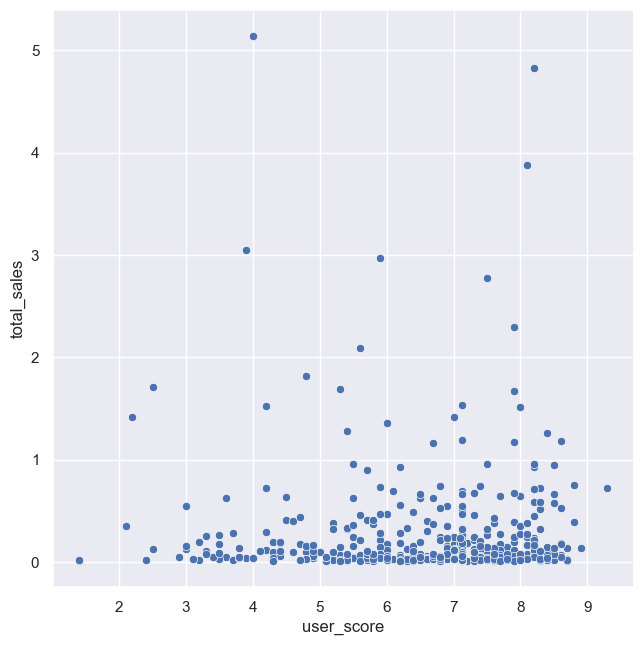

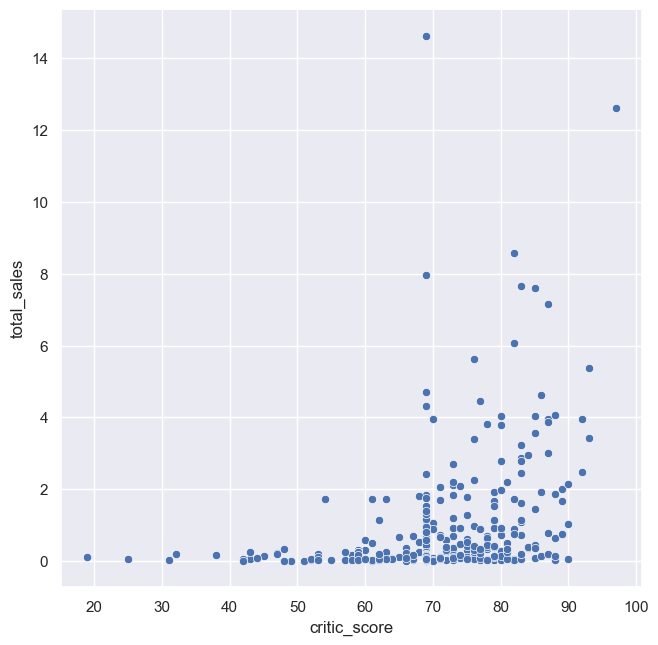

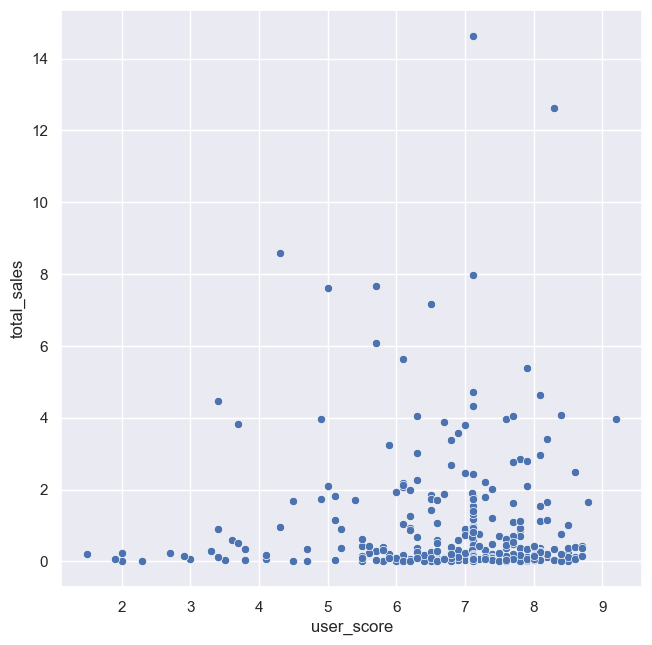

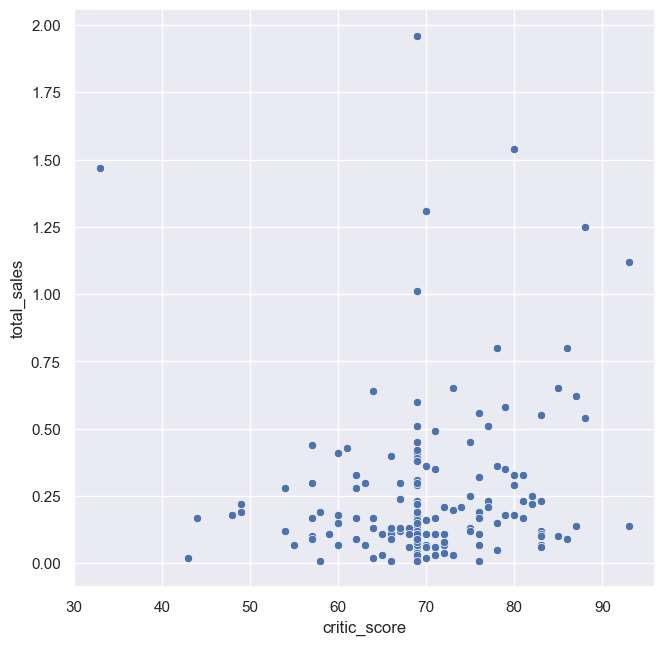

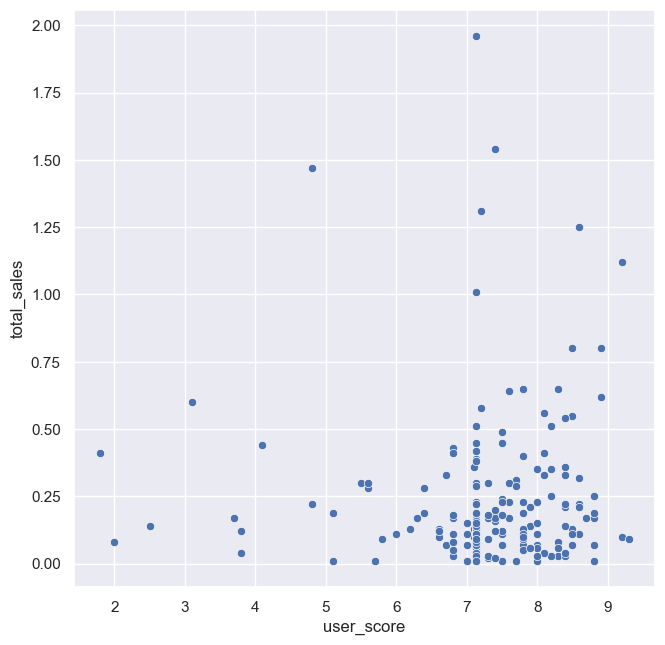

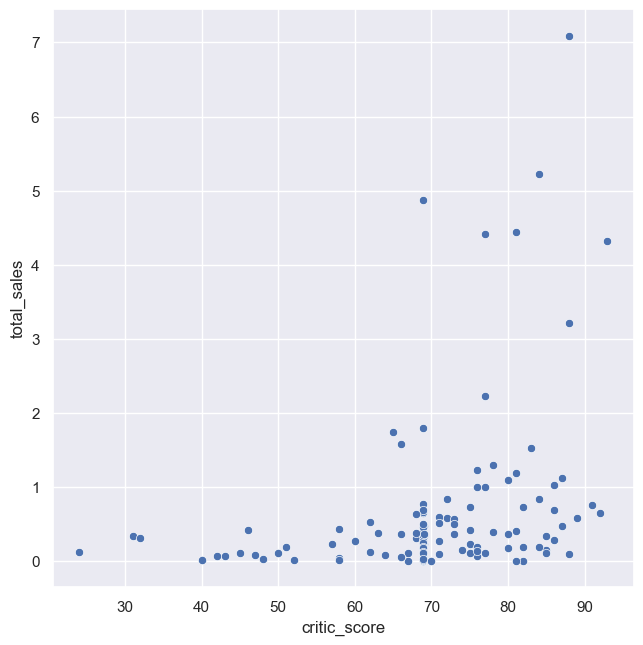

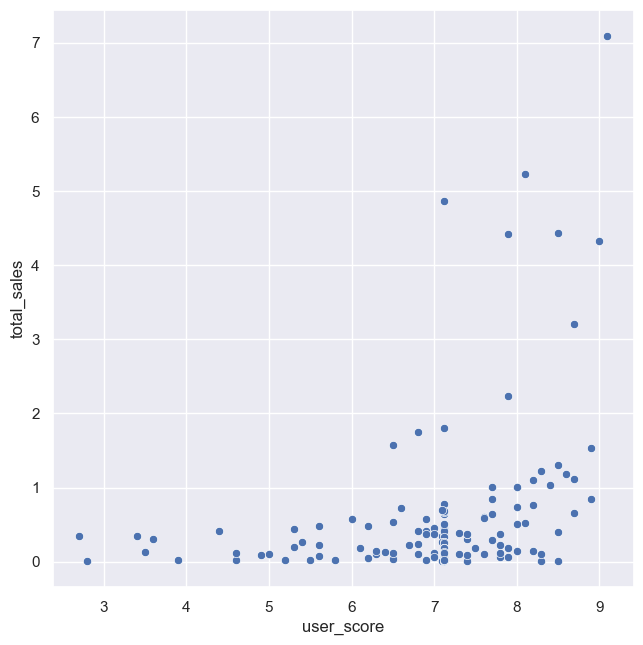

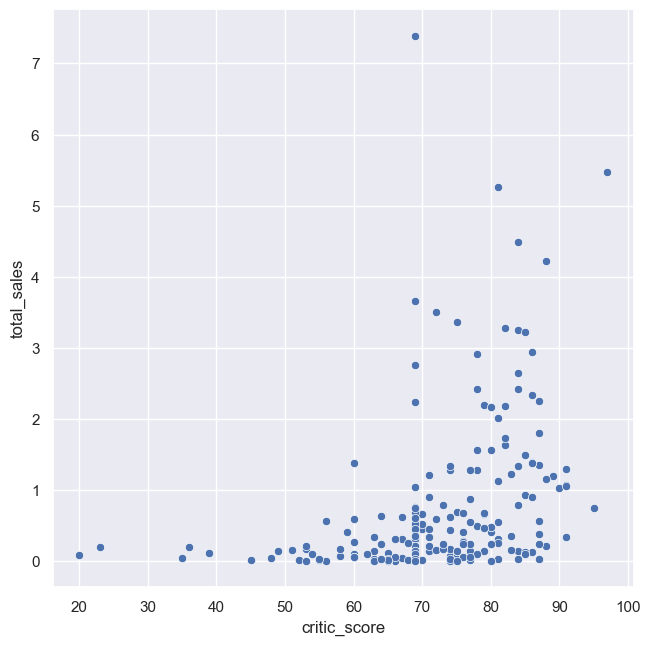

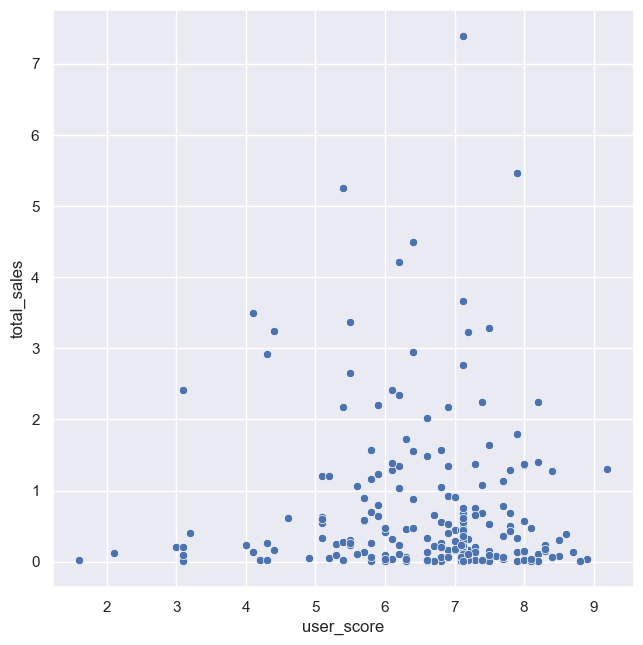

In [35]:
# Ejecucion de la funcion anterior

#Plataformas con ventas masyores a 0 en el 2016
for value in sales_2016.index:
#todas las plataformas
#for value in clean_data['platform'].unique():
    correlacion(clean_data, value)

**Conclucion:**

Del analisis anterior se observa que no existe una correlacion lineal fuerte entre las ventas y las criticas de los expertos y los consumidores, ya que los valores presentados oscilan entre -50% al 50% de correlacion, para el caso del analisis de las criticas entre si, se observa una correlacion potencialmente fuerte ya que se observa qu ela correlacion esta en promedio de un 60 a 70% lo que nos muestra que las opiniones entre los expertos y los usuarios estan relacionadas entre si.

## Analisis de juegos por genero

Ahora pasaremos al analisis de los juegos por genero, vamos a ver en el siguiente box plot y la tabla dinamica, el objetivo de estas visualizaciones es poder ilustrar cual es juego mas vendido desde el 2010, asi como tambien ver que genero tiene mas ventas desde el 2010.

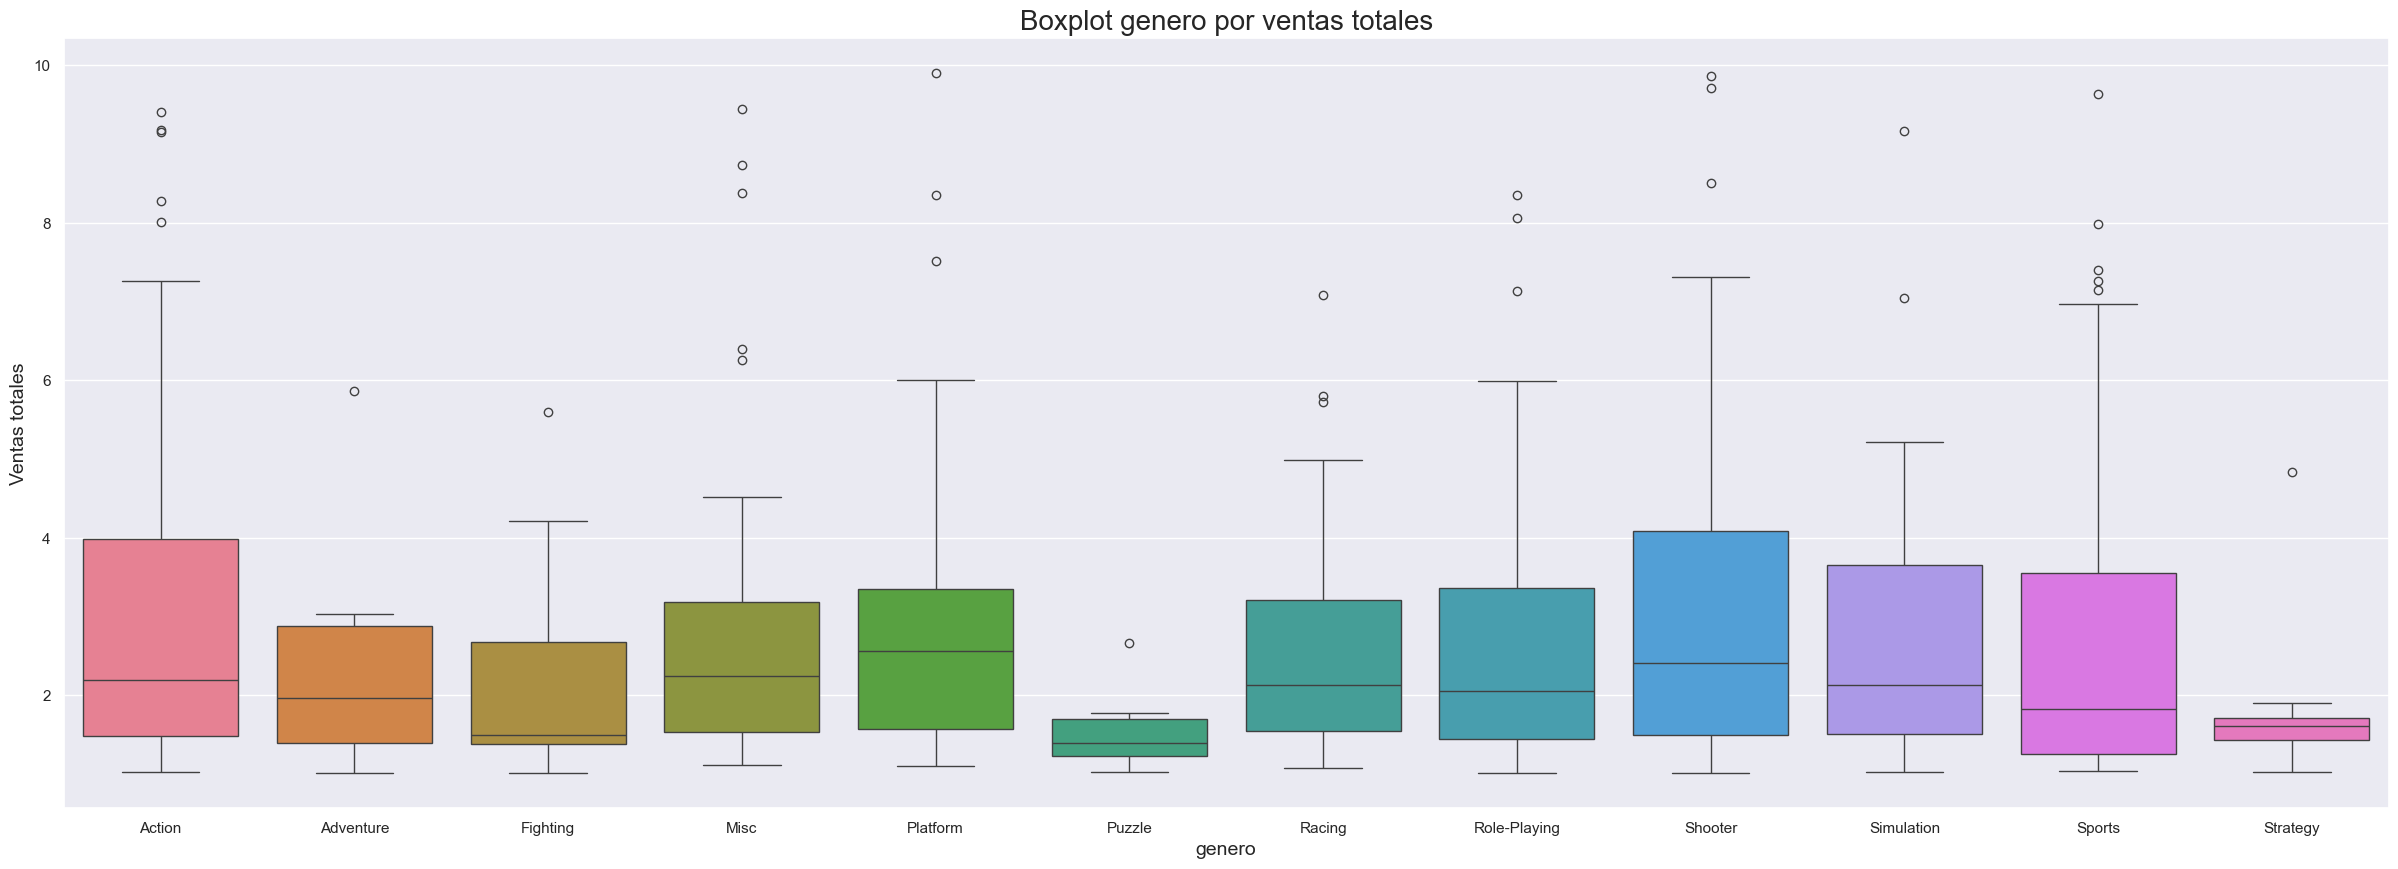

In [36]:
#juegos por nombre
games_per_genre = clean_data.pivot_table(values='total_sales', index=['genre', 'name'], aggfunc='sum').reset_index()
games_per_genre.query('1 < total_sales <= 10', inplace=True)
display(games_per_genre)
sns.set_theme(rc={'figure.figsize':(30,10)})
sns.boxplot(data=games_per_genre, x='genre', y='total_sales', hue='genre')
plt.title('Boxplot genero por ventas totales', fontsize=20)
plt.xlabel('genero', fontsize=14)
plt.ylabel('Ventas totales', fontsize=14)
plt.show()
sales_per_genre = clean_data.pivot_table(values='total_sales', index='genre', aggfunc='sum').reset_index()
sales_per_genre

**Conclusion:**

segun el boxplot mostrado anteriormente, los juegos de shooter con los juegos que tienen mas ventas en promedio, apesar que los juegos de accion tiene en total mas ventas, en genral los generos en los videojuegos tiene una variacion grande entre cada uno, tal como se ve en el boxplot, las variaciones en los datos en algunos generos son muy altas y las medianas no se parecen entre generos. 

## analisis de las plataformas top 6

Ahora realizaremos un analisis sobre el perfil de usuario que tenemos en nuestra tienda comprando, analizando en que parte del mundo tenemos mas ventas y en que plataforma se realizan estas ventas, esto se vien a visualizar mediante una pivot y el grafico de barras que muestra un como se comportan las ventas de las consolas (top 6 en ventas totales) en las  diferentes regiones del mundo.

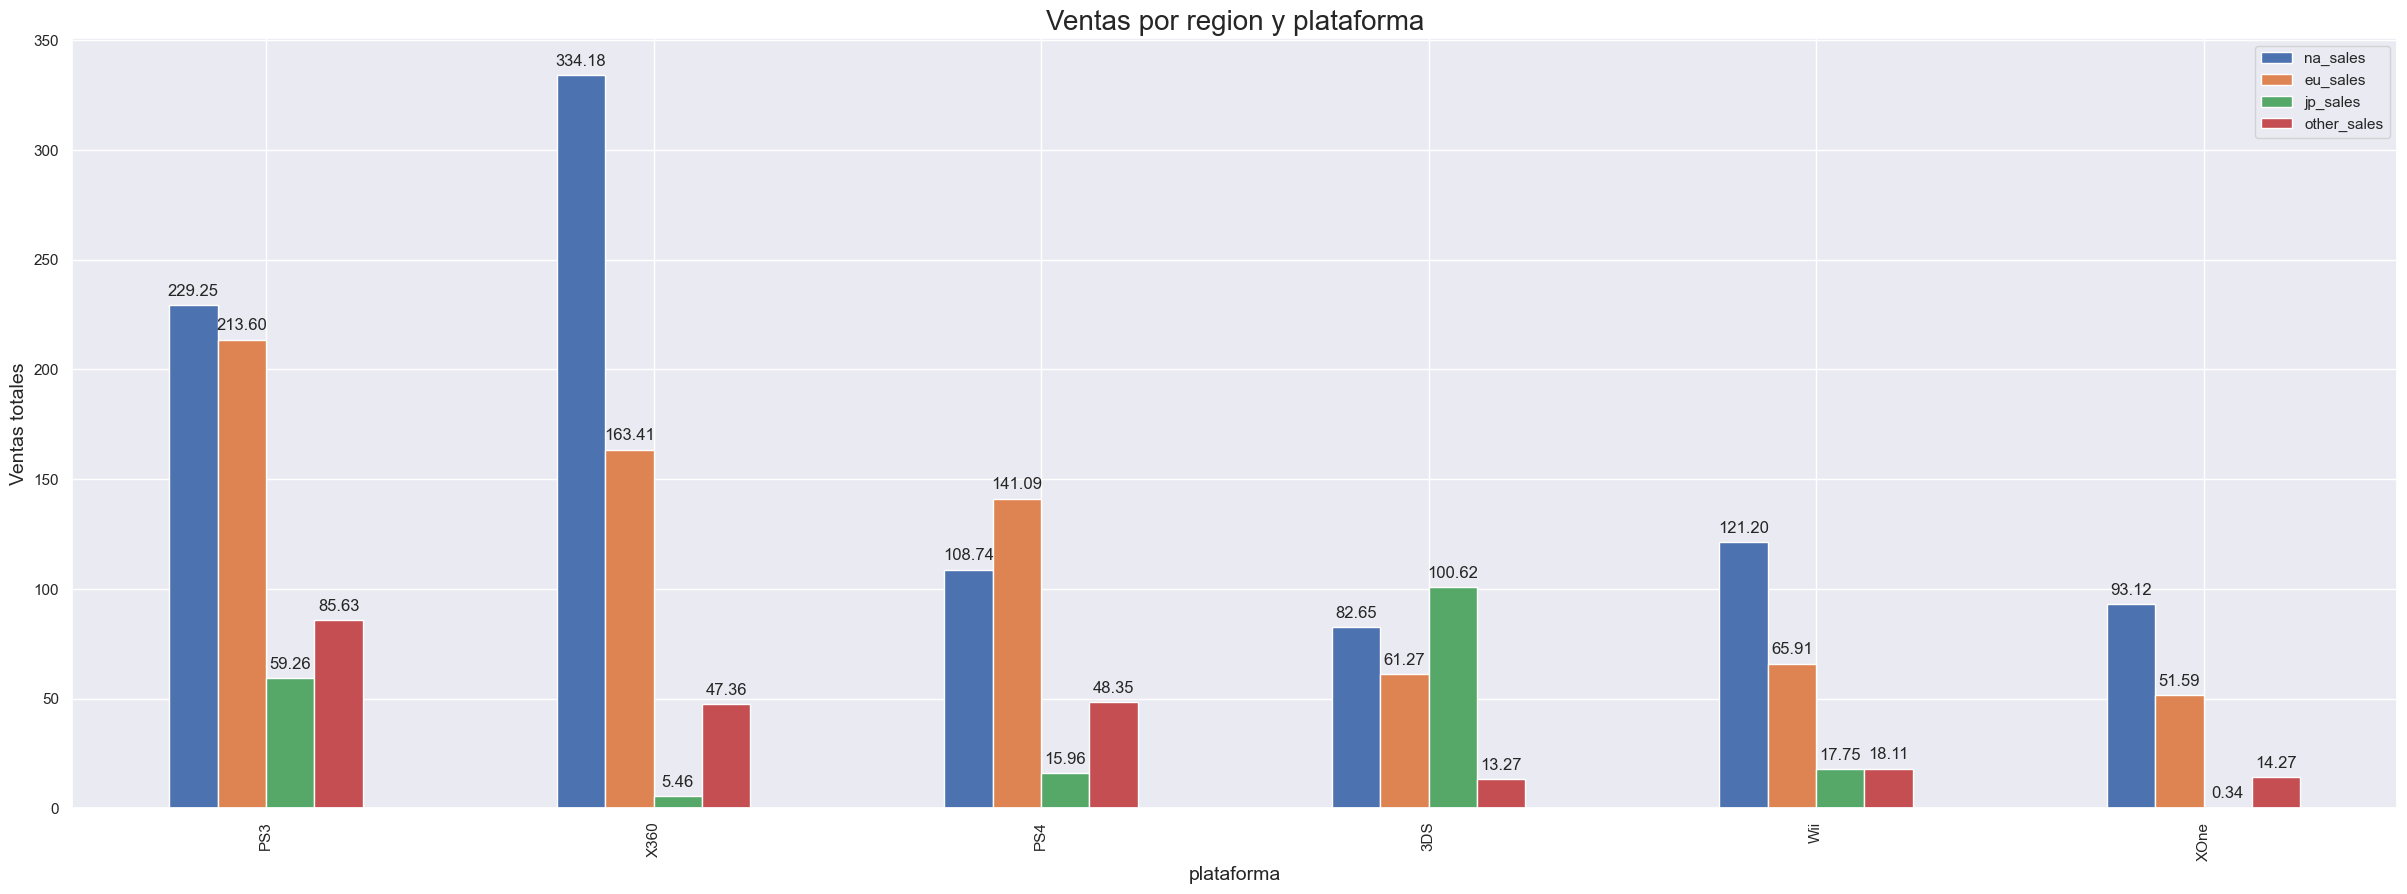

In [37]:
#Las cinco plataformas principales
sales_platform = clean_data.pivot_table(values=['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'], index='platform', aggfunc='sum').sort_values('total_sales', ascending=False).reset_index() 
top5_platform = sales_platform.head(6)
display(top5_platform)
ax = top5_platform.plot( x='platform', y=['na_sales','eu_sales','jp_sales','other_sales'], kind='bar')
plt.title('Ventas por region y plataforma', fontsize=20)
plt.xlabel('plataforma', fontsize=14)
plt.ylabel('Ventas totales', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.show()

**Conclusion:**

segun el analisis realizado se puede ver que las plataforma que tiene mas ventas a nivel nmundial, no es lider en las ventasde NA por una diferencia de mas de 105 M USD respecto al X360. Sony con su plataforma de playstation tiene la mayor participacion de mercado sobre su competencia en regiones como europa y otras regiones del mundo, nintendo con susplataformas 3DS y Wii tiene el domino en Japon y Microsoft con susplataformas de XOne y X360 domina el mercado en Norte america. 

Laregion que tiene mas ventas a nivel mundial es Norteamerica, mientras que Japon es el pais con menor venta.

In [38]:
#cuotas de mercado
total_eu = sales_platform['eu_sales'].sum()
total_jp = sales_platform['jp_sales'].sum()
total_na = sales_platform['na_sales'].sum()
total_other = sales_platform['other_sales'].sum()
total_sales = sales_platform['total_sales'].sum()
top5_platform_percent = pd.DataFrame({
    'platform': top5_platform['platform'],
    'eu_sales_percent': top5_platform['eu_sales'] / total_eu * 100,
    'jp_sales_percent': top5_platform['jp_sales'] / total_jp * 100,
    'na_sales_percent': top5_platform['na_sales'] / total_na * 100,
    'other_sales_percent': top5_platform['other_sales'] / total_other * 100,
    'total_sales_percent':top5_platform['total_sales'] / total_sales * 100
})

print('Distribucion porcnetual de ventas por platafomra y region:')
display(top5_platform_percent)



la tabla anterior confirma la conclusion presnetada anteriormente sobre la distribucion de ventas a nivel mundial, aca se puede ver como fluyen las ventas de juegos por mataformas y como es la cuota porcentual de mercado por cada region por plataforma y a nivel mundial.

## Analisis de genero top 5

Ahora realizaremos un analisis sobre el perfil de usuario que tenemos en nuestra tienda comprando, analizando que genero prefieren comparar en cada region del mundo.

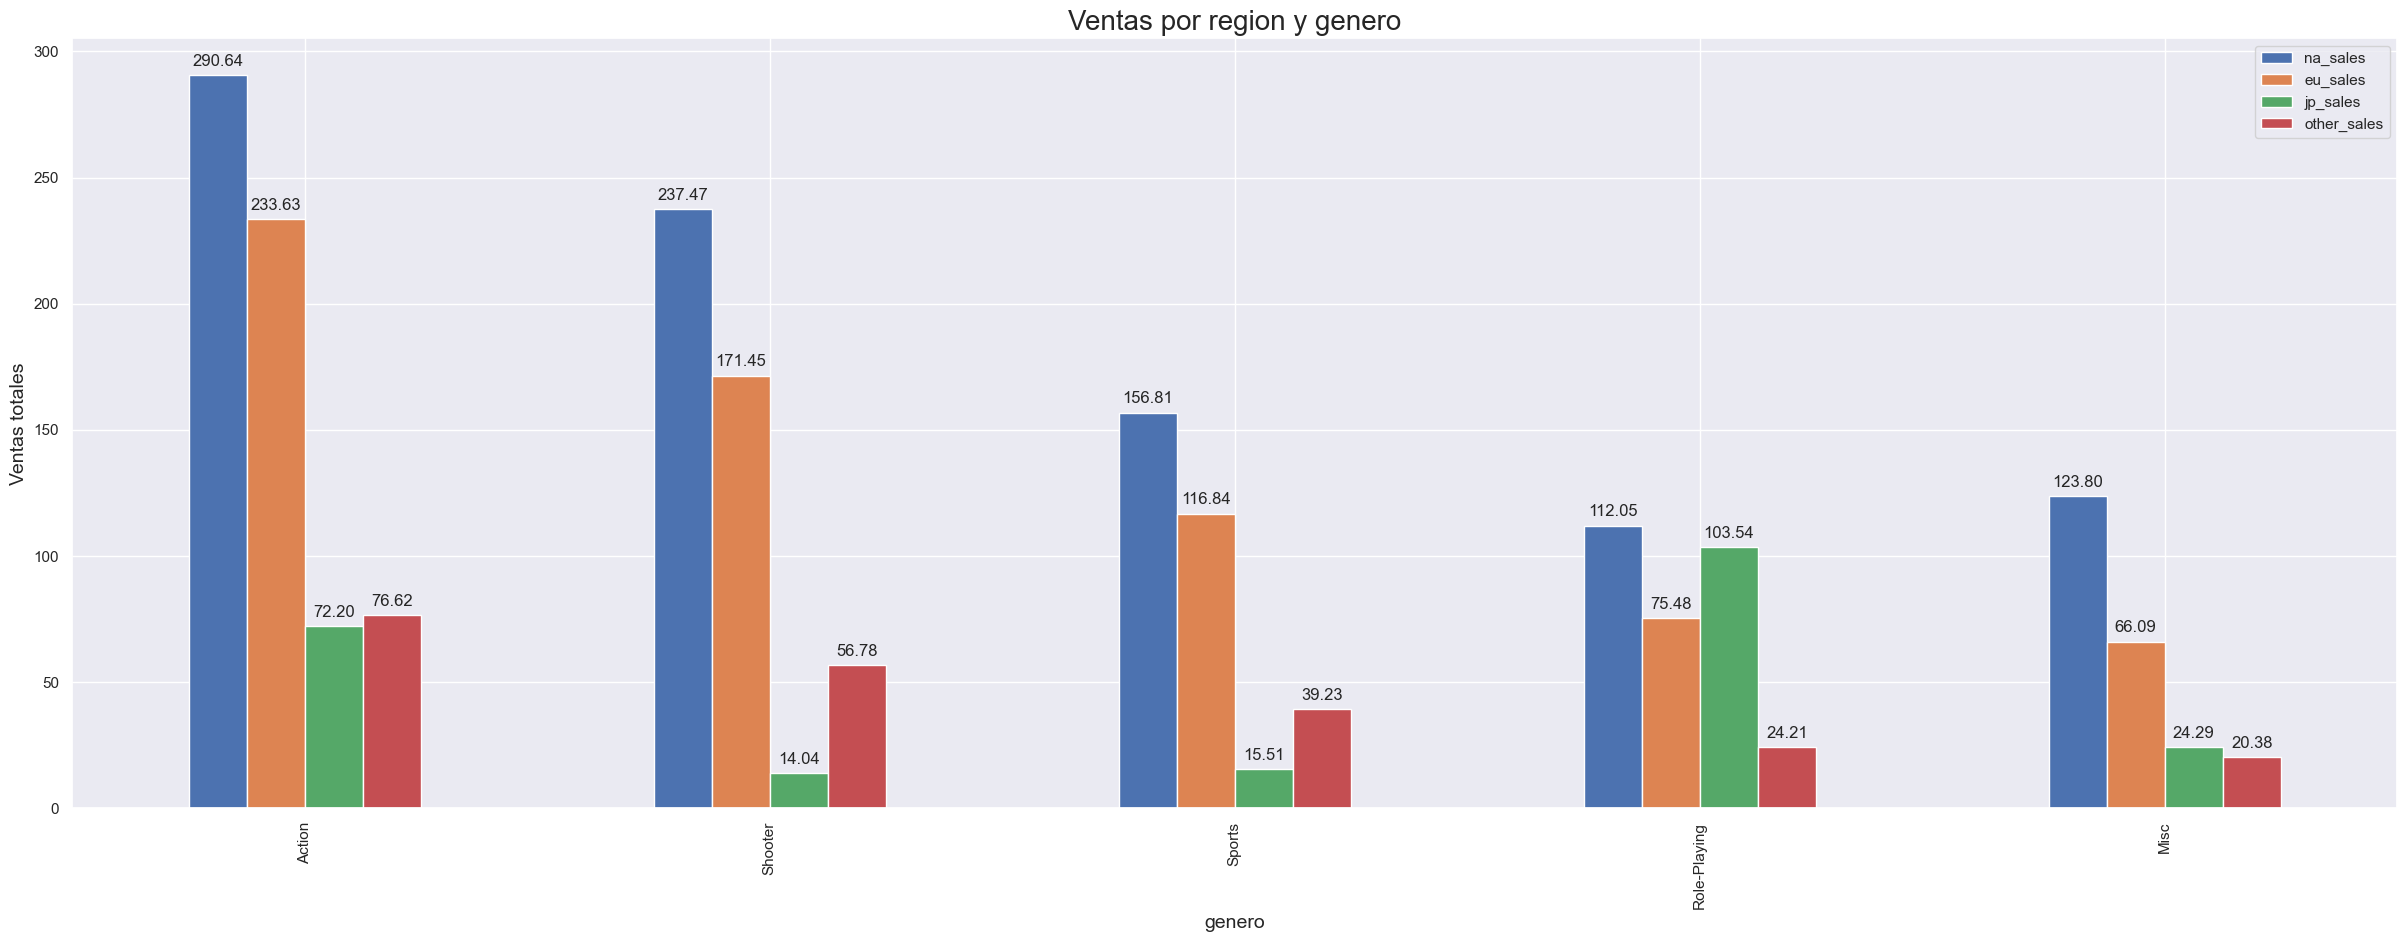

In [39]:
#Las cinco generos principales
sales_genre = clean_data.pivot_table(values=['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'], index='genre', aggfunc='sum').sort_values('total_sales', ascending=False).reset_index() 
top5_genre = sales_genre.head(5)
display(top5_genre)
ax = top5_genre.plot( x='genre', y=['na_sales','eu_sales','jp_sales','other_sales'], kind='bar')
plt.title('Ventas por region y genero', fontsize=20)
plt.xlabel('genero', fontsize=14)
plt.ylabel('Ventas totales', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
plt.show()

**Conclusion**

Los juegos de accion son los preferidos a nivel mundial, es el genero que mas se vende en todas las regiones del mundo menos en Japan, lugar donde prefieren los juegos de rol.

de hecho para la distribucion de generos a nivel mundial para todas las regiones, menos para japan tienen el mismo orden el top de generos, para el caso de Japon el que mas se vende son los juegos de rol, seguido por accion, misc, sport y de ultimas los shooter. 

## Pruebas de hipotesis

en esta parte del analisis voy a realizar dos pruebas de hipotesis para verificar los siguientes casos:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


In [40]:
#pruebas de hipotesis:
#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

xbox_one_ratings = clean_data[clean_data['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = clean_data[clean_data['platform'] == 'PC']['user_score'].dropna()
alpha = 0.05

levene_results = st.levene(xbox_one_ratings, pc_ratings)
print('Prueba de Levene - valor p:', levene_results.pvalue)

equal_var = levene_results.pvalue > alpha

results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=equal_var)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

la Prueba de hipotesis para  calcular la probabilidad de ver si las calificaciones para las plataformas Xone y PC son iguales se realizo meidante un prueba de hipotesis sobbre la igualdad de las medias de dos poblaciones, ya que lo que buscamos probar es ver si hay una probailidad de que las medias de estas poblaciones fueran igual. la prueba concluye que son muy similares y por lo tanto no podemos rechazar la hipotesis, con un nivel de confiabiulidad del 5% tiene una probailidad del 98% en que los rating sean iguales. 

In [41]:
#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
action_score = clean_data[clean_data['genre'] == 'Action']['user_score'].dropna()
sport_score = clean_data[clean_data['genre'] == 'Sports']['user_score'].dropna()
alpha = 0.05

levene_results = st.levene(action_score, sport_score)
print('Prueba de Levene - valor p:', levene_results.pvalue)

equal_var = levene_results.pvalue > alpha

results = st.ttest_ind(action_score, sport_score, equal_var=equal_var)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

la prueba de hipotesis ahora consiste en ver que el promedio de calificacion para los juegos de deportes y accion son diferentes, esta prueba consta de una prueb ade hipotesis sobre igualdad de los medias, pero aca usare el parametro de varianza de igualdad como falso para poder compara lo que se necesita. al igual la prueba se calcula con un nivel de confiabilidad del 5%, su resultado es de rechazo a la hipotesis, ya que tiene una probabilidad menor al 1%.



## Conclusion general

*una vez realizado el analisis de ventas de video juegos para la tienda ICE, encontramos que para el siguiente año las pltaformas que van a traer ventas son las que estan emergiendo principalmente de los fabricantes como Sony, Microsoft y Nintendo, ademas los juegos mas vendidos para este ciclo seran los juegos de accion en la mayor parte del mundo mientras que en Japon, donde nintendo es lider en ventas los juegos de role son los preferidos por los usuarios.*